In [11]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from sklearn import metrics
import pandas as pd
import os

## Plots settings

In [2]:
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'font.family': 'Georgia'})    

## Load data

In [3]:
files = os.listdir('./input_data/')
dataset_filenames = sorted([file for file in files if 'results' in file])
plot_names = ['Full dataset', '10 km dataset', '7 km dataset', '4 km dataset']
plot_lines = [':', 'r--', '-', '-.']

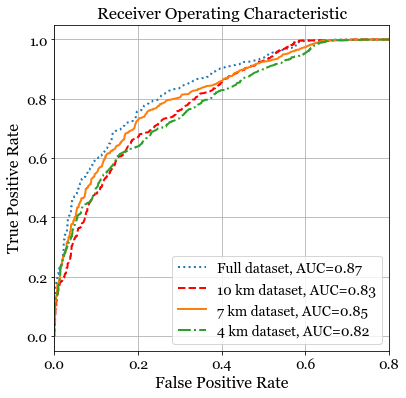

In [30]:
plt.figure(figsize=(6,6))
plt.grid()
for index, filename in enumerate(dataset_filenames):
    df = pd.read_csv(os.path.join('input_data',filename), index_col=0)
    df.columns = ['proba', 'labels']
    fpr, tpr, _ = metrics.roc_curve(df['labels'],  df['proba'])
    auc = metrics.roc_auc_score(df['labels'],  df['proba'])
    plt.plot(fpr,tpr,plot_lines[index], linewidth=2, label=f"{plot_names[index]}, AUC={auc:.2f}",)
    plt.legend(loc=4)
    plt.grid()
plt.title('Receiver Operating Characteristic')
plt.xlim([0, 0.8])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontdict={'fontsize':16})
plt.xlabel('False Positive Rate', fontdict={'fontsize':16})
plt.savefig('./plots/ROC_AUC.png', dpi=300)
plt.savefig('./plots/ROC_AUC.svg')
plt.show()


### Mean Decrease Accuracy  and  Mean Decrease Gini Plots

In [9]:
features = ['SOC', 
'CEC',
'BIO1',
'BIO8',
'BIO10',
'BIO13',
'BIO15',
'BIO19']
MeanDecreaseAccuracy = [72.50372,
74.65408,
66.32186,
67.97182,
61.79797,
98.30954,
82.80173,
72.04455]
MeanDecreaseGini = [155.8301,
133.2856,
223.2341,
264.2242,
215.9778,
220.6913,
162.4989,
155.5405]

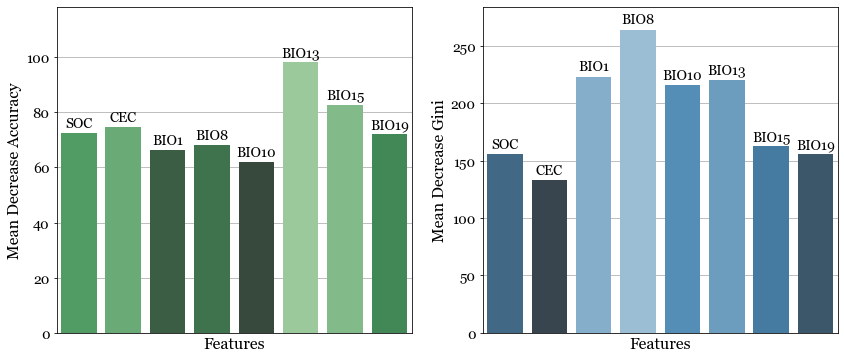

In [31]:
df = pd.DataFrame(data=[features, MeanDecreaseAccuracy, MeanDecreaseGini]).T
df.columns = ['Features', 'MeanDecreaseAccuracy', 'MeanDecreaseGini']

pal = sns.color_palette("Greens_d", len(df))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

rank = df["MeanDecreaseAccuracy"].argsort().argsort() 

g=sns.barplot(x='Features',y='MeanDecreaseAccuracy',data=df, palette=np.array(pal[::-1])[rank], ax=ax1)

for index, row in df.iterrows():
#     g.text(row.name,row.MeanDecreaseAccuracy+1, round(row.MeanDecreaseAccuracy,2), color='black', ha="center")
    g.text(row.name,row.MeanDecreaseAccuracy+2, row.Features, color='black', ha="center")

pal = sns.color_palette("Blues_d", len(df))
rank = df["MeanDecreaseGini"].argsort().argsort() 
g=sns.barplot(x='Features',y='MeanDecreaseGini',data=df, palette=np.array(pal[::-1])[rank], ax=ax2)

for index, row in df.iterrows():
#     g.text(row.name,row.MeanDecreaseAccuracy+1, round(row.MeanDecreaseAccuracy,2), color='black', ha="center")
    g.text(row.name,row.MeanDecreaseGini+5, row.Features, color='black', ha="center")

ax1.set_xlabel('Features', fontdict={'fontsize':16})
ax2.set_xlabel('Features', fontdict={'fontsize':16})
ax1.set_ylabel('Mean Decrease Accuracy', fontdict={'fontsize':16})
ax2.set_ylabel('Mean Decrease Gini', fontdict={'fontsize':16})
ax1.grid(which='both')
ax2.set_axisbelow(True)
ax1.set_axisbelow(True)
ax2.grid()
ax2.set_xticks([])
ax1.set_xticks([])
ax1.set_ylim(0,np.max(df['MeanDecreaseAccuracy'])+20)
ax2.set_ylim(0,np.max(df['MeanDecreaseGini'])+20)
plt.savefig('./plots/FeatureImportance.png', dpi=300, bbox_inches='tight')
plt.savefig('./plots/FeatureImportance.svg', bbox_inches='tight')
plt.show()